# Modelo de Volterra

$$
\begin{array}{cc}
\dot{x}&=ax-bxy\\
\dot{y}&=-cy+dxy
\end{array}
$$

In [37]:
from numpy import *
from matplotlib.pyplot import *
from scipy.integrate import *

In [38]:
a = 1.
b = 0.1
c = 1.5
d = 0.75
def dX_dt(X, t=0):
    return array([ a*X[0] -   b*X[0]*X[1] ,
                  -c*X[1] + d*b*X[0]*X[1] ])

## Análisis local

In [39]:
X_f0 = array([     0. ,  0.])
X_f1 = array([ c/(d*b), a/b])
#all(dX_dt(X_f0) == zeros(2) ) and all(dX_dt(X_f1) == zeros(2))

In [40]:
def d2X_dt2(X, t=0):
    return array([[a -b*X[1],   -b*X[0]     ],
                  [b*d*X[1] ,   -c +b*d*X[0]] ])

In [41]:
A_f0 = d2X_dt2(X_f0)  

In [42]:
A_f1 = d2X_dt2(X_f1) 

In [43]:
lambda1, lambda2 = linalg.eigvals(A_f1)

In [46]:
lambda1

1.224744871391589j

In [47]:
T_f1 = 2*pi/abs(lambda1)  

## Solución numérica

In [48]:
t = linspace(0, 15,  1000)              
X0 = array([10, 5]) 
X= integrate.odeint(dX_dt, X0, t, full_output=True)


In [53]:
X[0].T

array([[10.        , 10.07578091, 10.1529783 , ...,  9.99869712,
         9.8872779 ,  9.78000354],
       [ 5.        ,  4.94421976,  4.88948321, ..., 17.56204194,
        17.3642589 , 17.16658946]])

Text(0.5,1,'Interaccion Depredador-Presa')

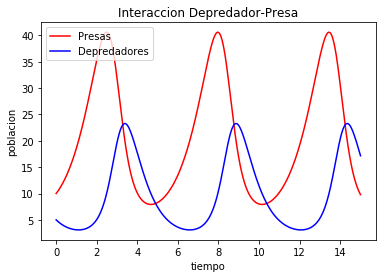

In [54]:
presas, depredadores = X[0].T
plot(t, presas, 'r-', label='Presas')
plot(t, depredadores  , 'b-', label='Depredadores')
legend()
xlabel('tiempo')
ylabel('poblacion')
title('Interaccion Depredador-Presa')


Text(0.5,1,'Plano-Fase')

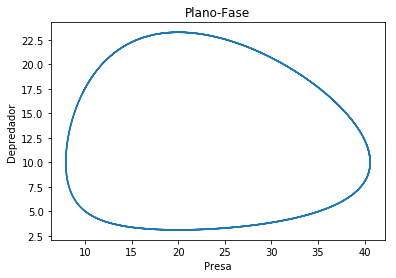

In [55]:
plot(presas,depredadores)
xlabel('Presa')
ylabel('Depredador')
title('Plano-Fase')

(0, 36.87747453556006)

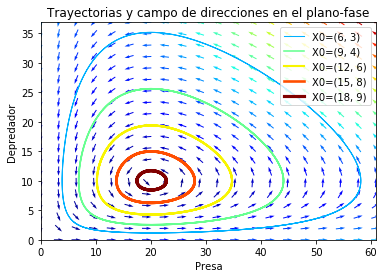

In [56]:
values  = linspace(0.3, 0.9, 5)                          
vcolors = cm.jet(linspace(0.3, 1., len(values)))  

for v, col in zip(values, vcolors):
    X0 = v * X_f1                               
    X = integrate.odeint( dX_dt, X0, t)         
    plot( X[:,0], X[:,1], lw=3.5*v, color=col, label='X0=(%.f, %.f)' % ( X0[0], X0[1]) )

ymax = ylim(ymin=0)[1]                        
xmax = xlim(xmin=0)[1]
nb_points   = 20

x = linspace(0, xmax, nb_points)
y = linspace(0, ymax, nb_points)

X1 , Y1  = meshgrid(x, y)                       
DX1, DY1 = dX_dt([X1, Y1])                      
M = (hypot(DX1, DY1))                           
M[ M == 0] = 1.                                  
DX1 /= M                                       
DY1 /= M

title('Trayectorias y campo de direcciones en el plano-fase')
Q = quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=cm.jet)
xlabel('Presa')
ylabel('Depredador')
legend()
xlim(0, xmax)
ylim(0, ymax)